In [ ]:
# Importing Libraries

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [4]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[139.75 143.75 154.75]
   [136.75 140.75 151.75]
   [135.75 139.75 150.75]
   ...
   [107.   104.   111.  ]
   [106.   103.   110.  ]
   [104.75 101.75 108.75]]

  [[134.5  138.5  149.5 ]
   [134.75 138.75 149.75]
   [136.   140.   151.  ]
   ...
   [107.75 104.75 111.75]
   [109.75 106.75 113.75]
   [107.25 104.25 111.25]]

  [[135.   139.   150.  ]
   [137.25 141.25 152.25]
   [139.25 143.25 154.25]
   ...
   [104.5  101.5  108.5 ]
   [104.25 101.25 108.25]
   [108.25 105.25 112.25]]

  ...

  [[146.25 151.75 160.25]
   [147.25 148.75 156.25]
   [148.5  146.25 155.5 ]
   ...
   [155.75 151.75 150.75]
   [152.5  148.   150.5 ]
   [153.25 150.75 156.75]]

  [[142.5  148.25 156.  ]
   [142.75 144.75 150.75]
   [144.5  142.5  151.  ]
   ...
   [145.5  141.5  140.5 ]
   [144.5  140.   142.5 ]
   [153.75 151.25 157.25]]

  [[137.25 143.25 150.25]
   [141.25 143.25 149.25]
   [145.5  143.5  151.  ]
   ...
   [154.5  150.5  149.5 ]
   [151.5  147.   149.5 ]
   [149.75 147.25 15

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu',))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu',))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25)) # To avoid overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output layer
model.add(Dense(units=38,activation='softmax'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 4030s 2s/step - loss: 1.3850 - accuracy: 0.5913 - val_loss: 0.5326 - val_accuracy: 0.8361
Epoch 2/10
2197/2197 [==============================] - 3863s 2s/step - loss: 0.4825 - accuracy: 0.8462 - val_loss: 0.2411 - val_accuracy: 0.9240
Epoch 3/10
2197/2197 [==============================] - 3905s 2s/step - loss: 0.2844 - accuracy: 0.9098 - val_loss: 0.1705 - val_accuracy: 0.9429
Epoch 4/10
2197/2197 [==============================] - 3737s 2s/step - loss: 0.1968 - accuracy: 0.9361 - val_loss: 0.0845 - val_accuracy: 0.9735
Epoch 5/10
2197/2197 [==============================] - 3790s 2s/step - loss: 0.1453 - accuracy: 0.9528 - val_loss: 0.1033 - val_accuracy: 0.9663
Epoch 6/10
2197/2197 [==============================] - 4179s 2s/step - loss: 0.1105 - accuracy: 0.9637 - val_loss: 0.0541 - val_accuracy: 0.9826
Epoch 7/10
2197/2197 [==============================] - 3955s 2s/step - loss: 0.0907 - accuracy: 0.9707 - val_loss: 0.0535 -

## Model Evaluation

In [27]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 587s 267ms/step - loss: 0.0471 - accuracy: 0.9854


In [28]:
print(train_loss,train_acc)

0.04712504893541336 0.9854470491409302


In [29]:
#Model  on validation set
val_loss,val_acc = model.evaluate(validation_set)

2197/2197 [==============================] - 647s 295ms/step - loss: 0.0471 - accuracy: 0.9854


In [34]:
print(val_loss,val_acc)

0.04712514579296112 0.9854470491409302


## Saving Model

In [32]:
model.save("trained_model.h5")

C:\Users\Logesh\anaconda3\envs\tensorflow\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
model.save("trained_model.keras")

In [35]:
training_history.history

{'loss': [1.3849880695343018,
  0.4824674129486084,
  0.28436416387557983,
  0.19682089984416962,
  0.14526741206645966,
  0.11045290529727936,
  0.09074347466230392,
  0.07628986984491348,
  0.06502269953489304,
  0.05630624666810036],
 'accuracy': [0.5912796258926392,
  0.8462479710578918,
  0.9097802042961121,
  0.9360978603363037,
  0.952841579914093,
  0.9636673927307129,
  0.9706522226333618,
  0.9748203754425049,
  0.978632926940918,
  0.982032835483551],
 'val_loss': [0.5325688719749451,
  0.24108299612998962,
  0.17049285769462585,
  0.08450766652822495,
  0.10330871492624283,
  0.054058704525232315,
  0.053485505282878876,
  0.09562399983406067,
  0.0771302729845047,
  0.04712512716650963],
 'val_accuracy': [0.8361334204673767,
  0.9240201711654663,
  0.9429120421409607,
  0.9734832048416138,
  0.9662707448005676,
  0.9826018810272217,
  0.9824027419090271,
  0.9690589904785156,
  0.9742371439933777,
  0.9854470491409302]}

#Recording History in json
import json
with open("training_hist.json","w") as f:
     json.dump(training_history.history,f)

In [37]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
     json.dump(training_history.history,f)

In [46]:
training_history.history["val_accuracy"]

[0.8361334204673767,
 0.9240201711654663,
 0.9429120421409607,
 0.9734832048416138,
 0.9662707448005676,
 0.9826018810272217,
 0.9824027419090271,
 0.9690589904785156,
 0.9742371439933777,
 0.9854470491409302]

###Accuracy Visualization

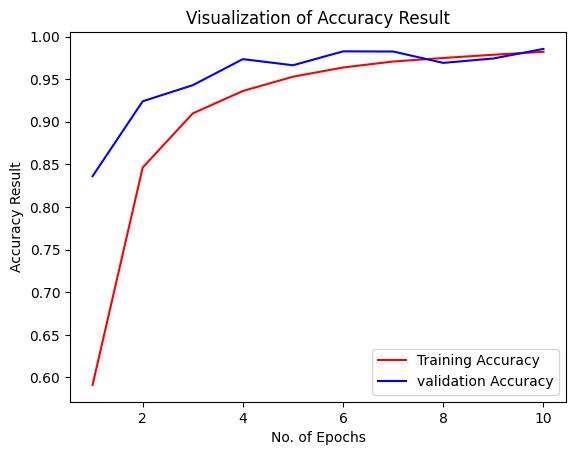

In [45]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history["accuracy"],color = "red", label = "Training Accuracy")
plt.plot(epochs,training_history.history["val_accuracy"],color = "blue", label = "validation Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [48]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [50]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [53]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 199s 361ms/step


(array([[9.9699152e-01, 3.0072401e-03, 5.0558725e-08, ..., 2.9095602e-14,
         1.0235700e-12, 4.8023729e-10],
        [2.9912823e-01, 7.0054984e-01, 5.1425019e-07, ..., 6.1610127e-12,
         9.4293802e-11, 4.9389321e-08],
        [9.9999762e-01, 1.7331199e-06, 9.4490229e-09, ..., 2.9067196e-16,
         8.6626229e-14, 2.7104236e-10],
        ...,
        [1.7196099e-09, 8.0658856e-12, 4.7984621e-08, ..., 3.4065833e-10,
         1.7396039e-10, 9.9999738e-01],
        [7.1889200e-10, 3.2282185e-12, 1.1340639e-07, ..., 1.0137230e-09,
         5.5783642e-11, 9.9999857e-01],
        [1.9486479e-14, 2.8686679e-16, 5.3684880e-14, ..., 5.6302005e-16,
         3.4817389e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [55]:
predicted_categories = tf.argmax(y_pred,axis = 1)

In [58]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  1,  0, ..., 37, 37, 37], dtype=int64)>

In [59]:
true_categories =tf.concat([y for x,y in test_set], axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [60]:
Y_true = tf.argmax(true_categories,axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

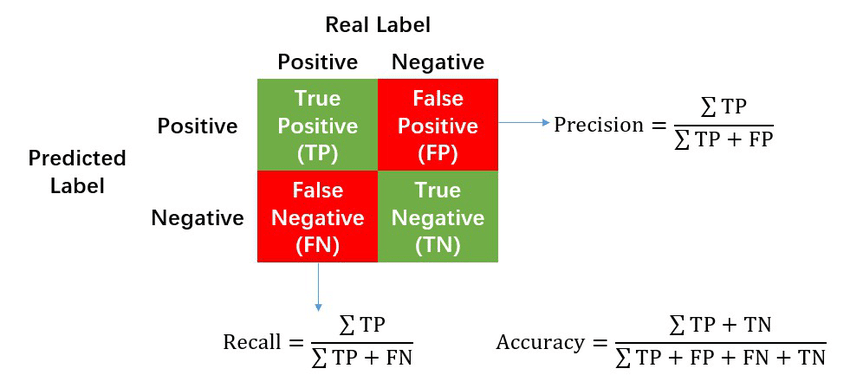

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(classification_report(Y_true,predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.89      0.93       504
                                 Apple___Black_rot       0.89      1.00      0.94       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.97       440
                                   Apple___healthy       0.98      0.87      0.92       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.91      0.92       410
                       Corn_(maize)___Common_rust_       0.94      1.00      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

In [70]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[449,  28,   0, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   0, 424, ...,   0,   0,   2],
       ...,
       [  0,   0,   1, ..., 484,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   0, 480]], dtype=int64)

##Confustion Matrix Visualization

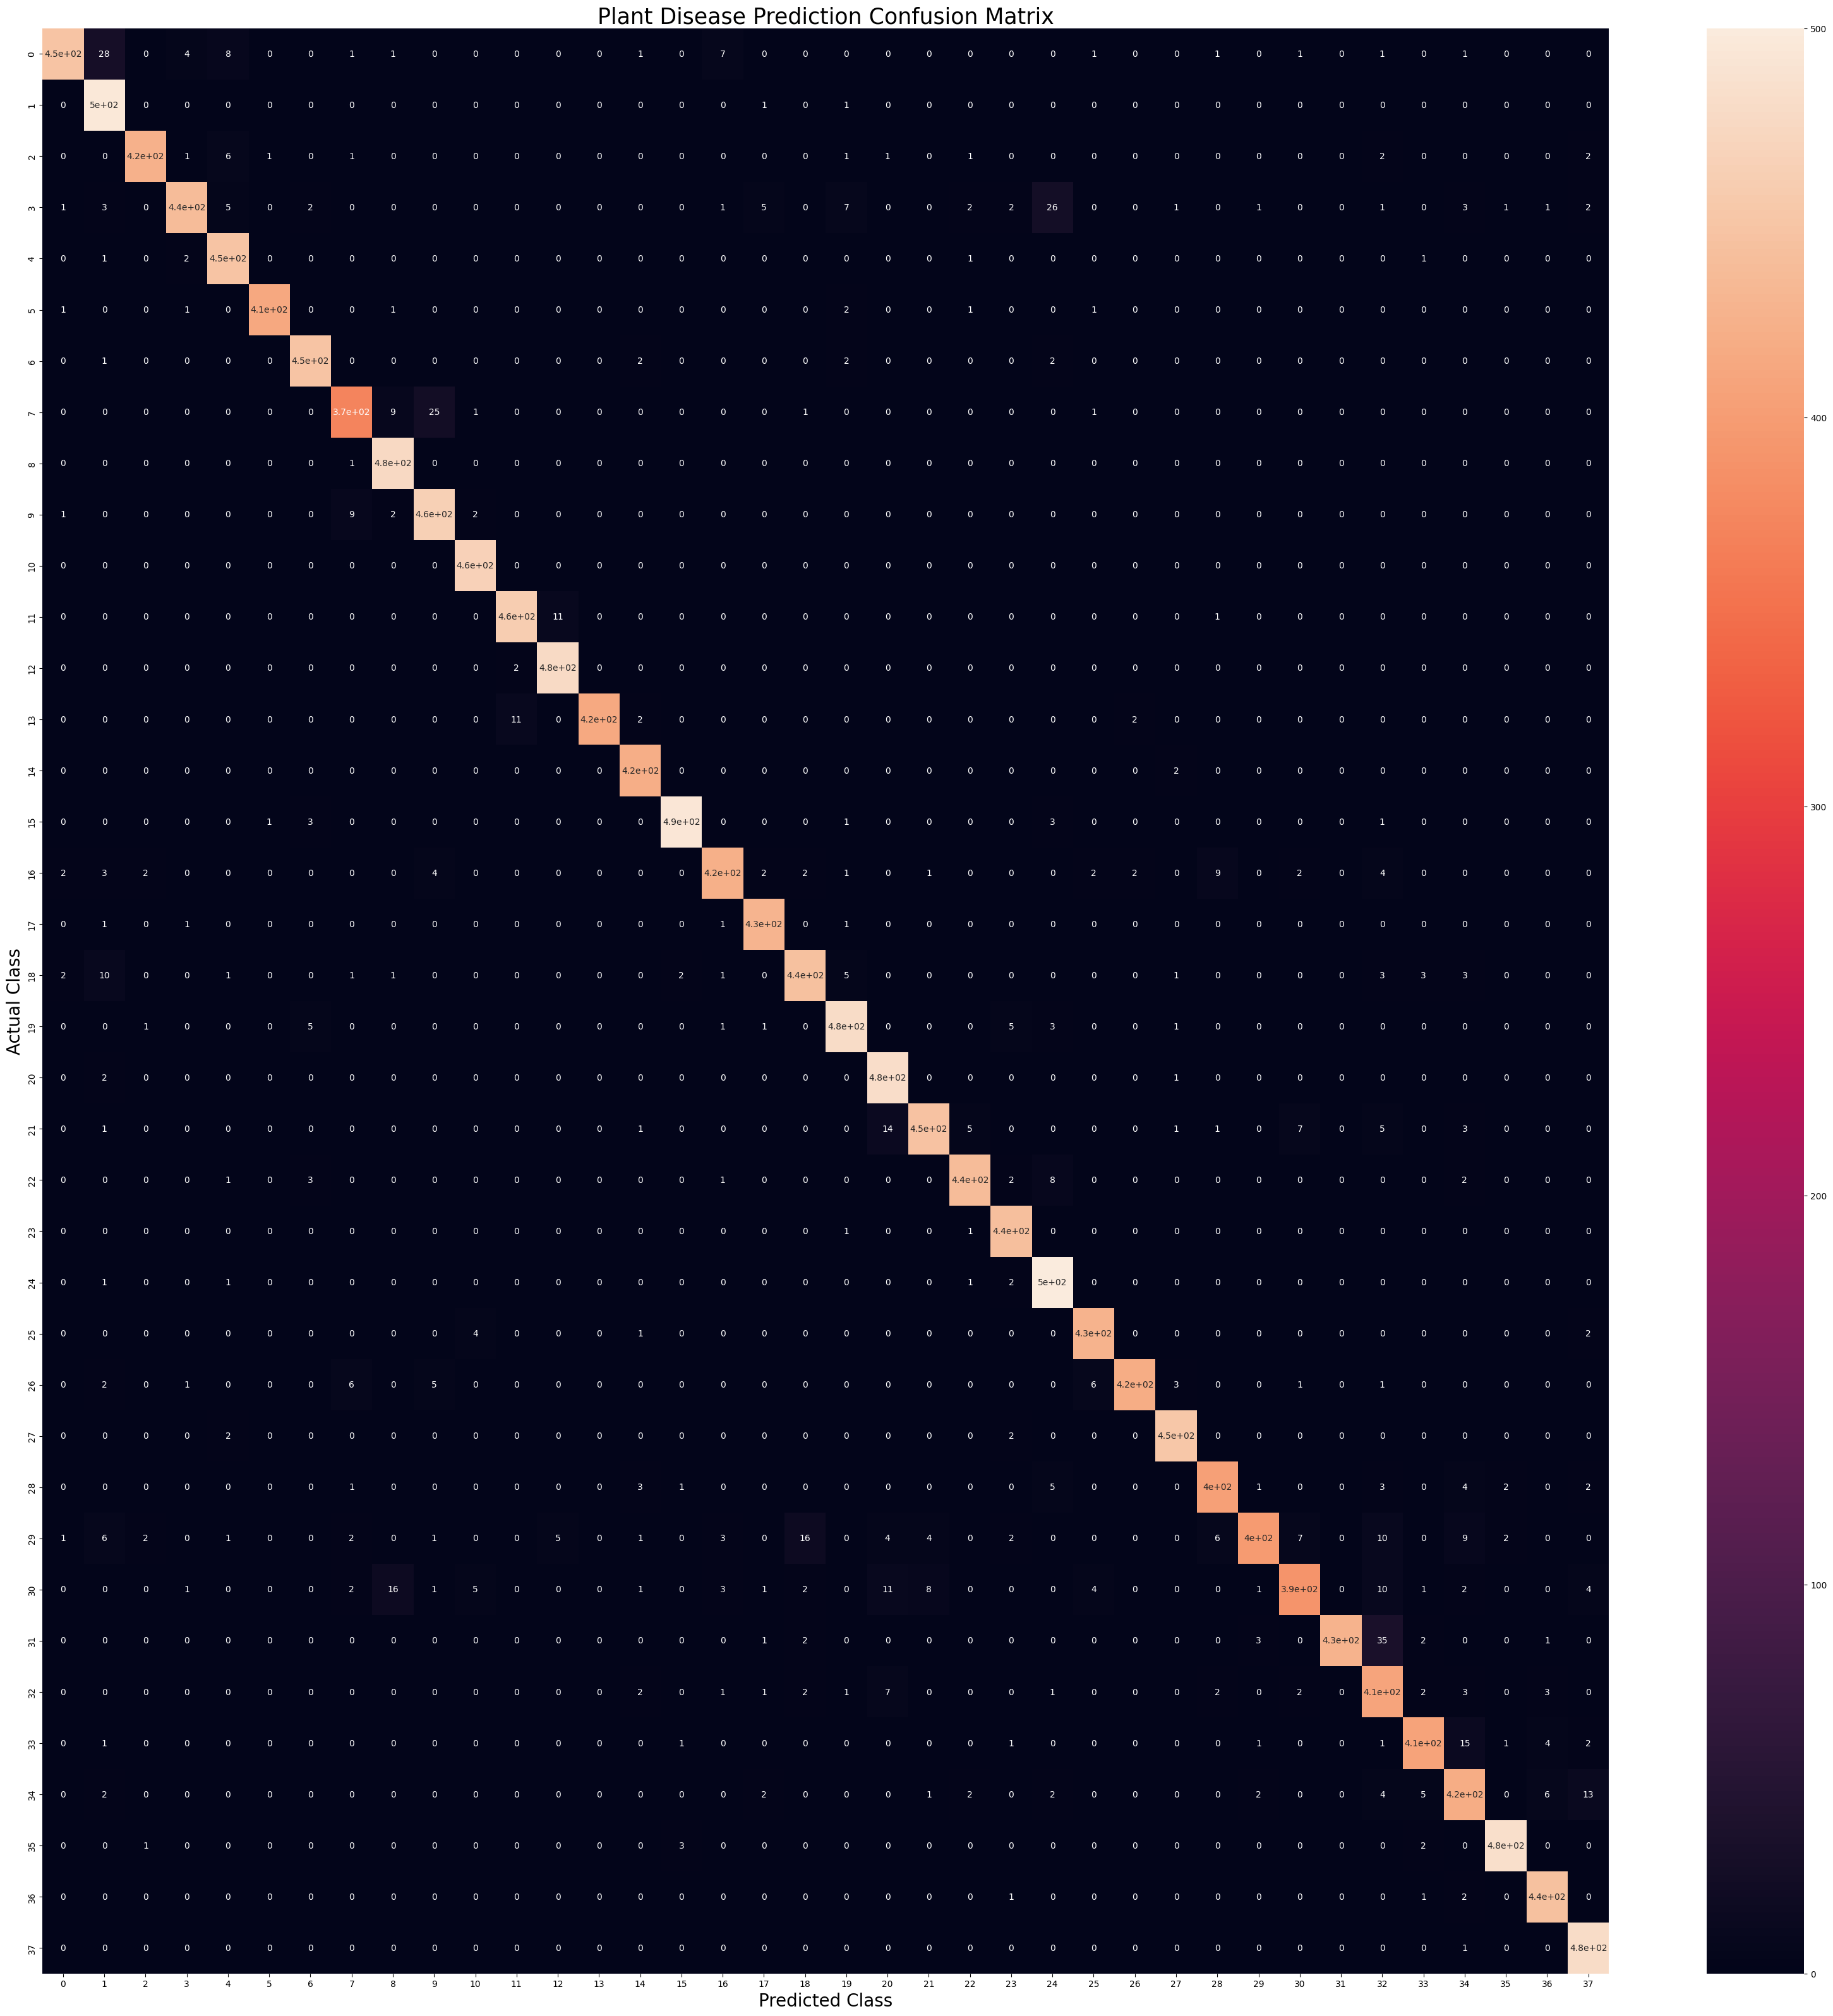

In [81]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot = True,annot_kws={"size" : 10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize = 25)
plt.show()

In [82]:
import tensorflow as tf
print("TensorFlow version:", tf.version)
print("Keras version:", tf.keras.version)

TensorFlow version: <module 'tensorflow._api.v2.version' from 'C:\\Users\\Logesh\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


AttributeError: module 'tensorflow.keras' has no attribute 'version'

In [87]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.13.0


AttributeError: module 'tensorflow.keras' has no attribute '__version__'

In [85]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("trained_model.keras")


AttributeError: 'Adam' object has no attribute 'build'

In [88]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.13.0


AttributeError: module 'tensorflow.keras' has no attribute '__version__'

In [89]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model("trained_model.keras")

# Re-save the model
model.save("updated_trained_model.h5")

AttributeError: 'Adam' object has no attribute 'build'